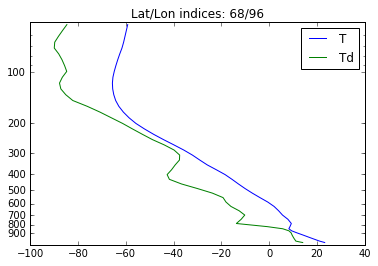

Missing lonindex argument


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import sys

class WRFPlay(object):
    dataset = " "
    run = False
    latindex = ""  # This is the south_north dimension in the NetCDF file
    lonindex = ""  # This is the west-east dimension in the NetCDF File
    def __init__(self, ncfilepath):
        try:
            #verify file exists & all the variables needed exist with the given file
            self.dataset = netCDF4.Dataset(ncfilepath, 'r')
        except Exception:
            print("Not a Valid File Name")
        else:
            self.run = True
         
        
    def sounding_plot(self, latindex=1000, lonindex=1000):
        if self.run:
            try:
                # 3D mositure - QVAPOR
                # Read the data into a NumPy array
                QVAPOR = self.dataset.variables['QVAPOR'][:]
                
                #verify lat, long falls in the range
                self.verifyLatLong(latindex,lonindex)
                        
                
                # Let's get the P and PB arrays
                P = self.dataset.variables['P'][:] # the perturbation pressure
                PB = self.dataset.variables['PB'][:] # the base state pressure

                # Create the total pressure millibar field
                P_mb = (P + PB) * 0.01

                # let's get the 3d array of temperature in degrees C
                theta = self.dataset.variables['T'][:] + 300.0 # convert petrubation potential temperature in Kelvin
                T_c = theta*((P_mb)/1000.0)**(2.0/7.0) -273.0

                # let's get the dew point
                # As per the formula dewpoint T = B/ln(X) where X = Ae/wp
                A = 2.53 * (10**9) # coversion from 1 kPa = 10 mbar
                B = 5.42 * (10**3)
                e = 0.622
                w = QVAPOR
                p = P_mb  

                x= (A*e)/(w*p)
                T_d = B / (np.log(0.622 * 2.53 * (10**9)/np.multiply(QVAPOR,P_mb)))
                T_d = T_d - 273.15 #convert to celsius


                #Vertical plot
                t_sounding = T_c[0,:,latindex,lonindex]
                t_d_sounding = T_d[0,:,latindex,lonindex]
                p_sounding = P_mb[0,:,latindex,lonindex]
                plt.semilogy(t_sounding, p_sounding,  label='T')
                plt.semilogy(t_d_sounding, p_sounding, color='green', label='Td')
                plt.legend(loc='upper right')
                plt.title('Lat/Lon indices: ' + str(latindex) +'/' + str(lonindex))
                plt.ylim(ymin=50.0, ymax=1050.0)
                plt.gca().invert_yaxis()

                #Set up ticks and labels on the y-axis
                ylocations = np.arange(100,1000,100)
                plt.yticks(ylocations, ylocations)

                plt.show()

            except Exception as error:
                print(error)
            
                
        else:
            print()
    def close(self):
        if self.run:
            self.dataset.close()
            
    def verifyLatLong(self, lat, lon):
        if lat == 1000:
            raise Exception('Missing latindex argument')
        elif lon == 1000:
            raise Exception('Missing lonindex argument')
        self.lat_index = lat 
        self.lon_index= lon 
        
            
    
    
WRFOUT_FILE_PATH = 'wrfout_d01_2017-09-09_12:00:00'
W = WRFPlay(ncfilepath=WRFOUT_FILE_PATH)
W.sounding_plot(lonindex=96, latindex=68)
W.sounding_plot(latindex=0)
W.close()

